In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
combined_balanced_df = pd.read_csv('../data/processed/combined_balanced.csv')

In [4]:
combined_balanced_df.columns

Index(['Unnamed: 0', 'clean_text', 'has_toxicity'], dtype='object')

train/test split

In [5]:
X = combined_balanced_df['clean_text']
y = combined_balanced_df['has_toxicity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Проверка размера
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

Train size: 32612, Test size: 8154


vectorization

In [6]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

logistic regression

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0     0.8641    0.9313    0.8965      4077
           1     0.9255    0.8536    0.8881      4077

    accuracy                         0.8924      8154
   macro avg     0.8948    0.8924    0.8923      8154
weighted avg     0.8948    0.8924    0.8923      8154



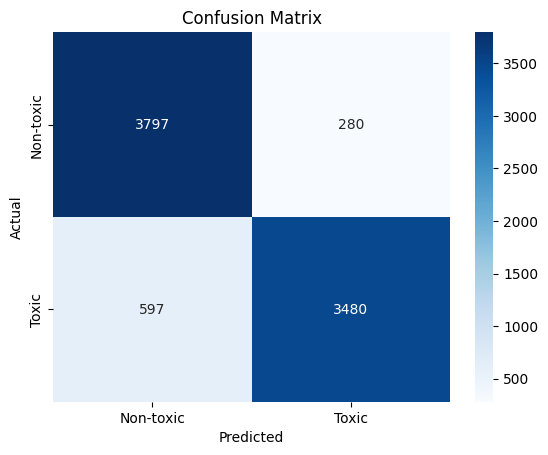

In [8]:
# Отчёт по метрикам
print(classification_report(y_test, y_pred, digits=4))

# Матрица ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
import joblib 

joblib.dump(model, '../models/logreg_model.pkl')
joblib.dump(vectorizer, '../models/tfidf_vectorizer.pkl')

['../models/tfidf_vectorizer.pkl']